# Author imformation:
Fan Shengzhe, Shanghaijiaotong University, Shanghai, China  
Email: fanshengzhe@sjtu.edu.cn

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir("drive/My Drive/crop_identification2/crop_identification")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
test_result = pd.read_csv('test_result.csv')
test_result = test_result.sort_values('model size(mb)', ascending=False)
test_result

,model name,loss,top-1 acc,top-3 acc,top-5 acc,top-10 acc,rwma,time taken(s),sample_num,speed(item/s),model size(mb)
8,efficientnet_v2_xl,1.7745,0.5366,0.7367,0.8113,0.8915,0.6513,201.9306,7891,39.0778,2375.7
4,ghost_efficientnet_v2_xl,0.8793,0.7559,0.8994,0.9377,0.9701,0.8336,177.6780,7891,44.4118,1454.1
7,efficientnet_v2_l,1.1872,0.6779,0.8464,0.9012,0.9445,0.7715,125.3634,7891,62.9450,1351.7
12,se_resnext_101,1.9173,0.5203,0.7159,0.7920,0.8742,0.6333,201.9888,7891,39.0665,917.1
3,ghost_efficientnet_v2_l,0.8362,0.7747,0.9066,0.9422,0.9725,0.8463,141.9325,7891,55.5968,830.2
6,efficientnet_v2_m,1.1505,0.7093,0.8636,0.9109,0.9520,0.7945,81.9605,7891,96.2781,610.7
11,se_resnext_50,1.1590,0.7231,0.8711,0.9131,0.9546,0.8042,141.9559,7891,55.5877,466.6
2,ghost_efficientnet_v2_m,0.8267,0.7801,0.9093,0.9436,0.9768,0.8503,141.9701,7891,55.5821,380.7
5,efficientnet_v2_s,0.9560,0.7630,0.9027,0.9375,0.9688,0.8382,81.9538,7891,96.2859,236.0
0,vanilla_cnn,2.7855,0.3795,0.5737,0.6620,0.7734,0.4960,48.3667,7891,163.1496,156.5


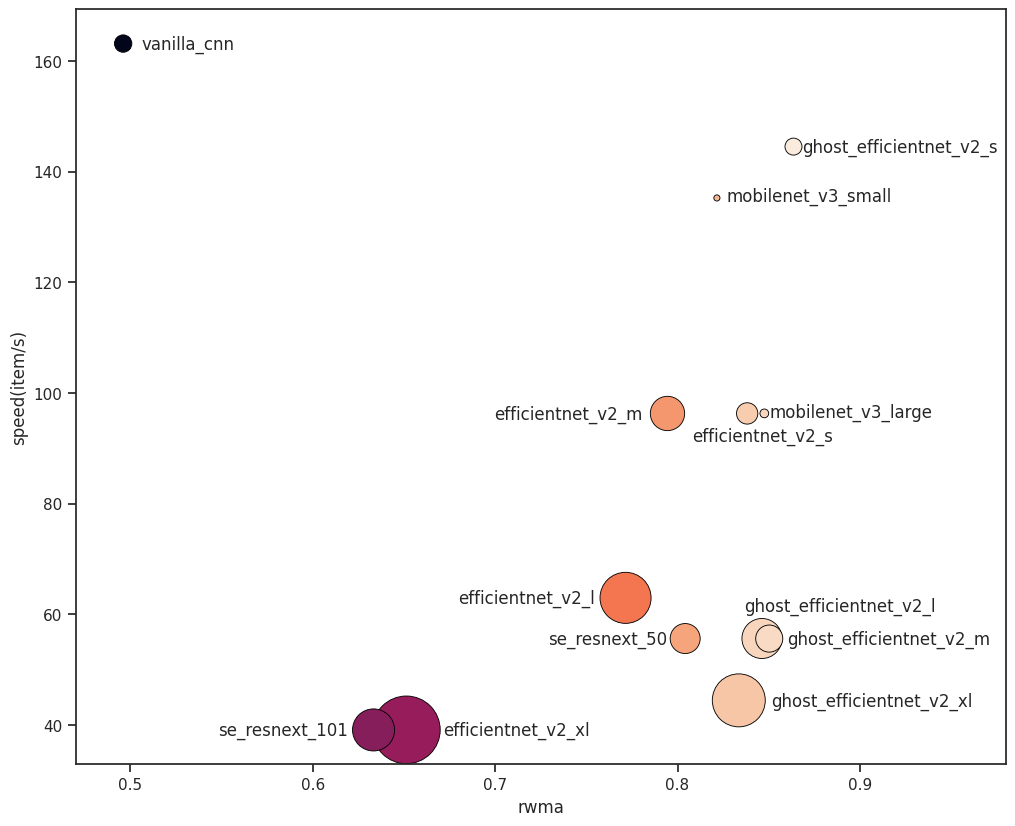

In [5]:
plt.rcParams['figure.dpi'] = 100
sns.set_context({'figure.figsize':[12, 10]})
sns.set_theme(style='ticks')  

minsize = min(test_result['model size(mb)'])
maxsize = max(test_result['model size(mb)'])

ax = sns.scatterplot(data=test_result, x='rwma', y='speed(item/s)', hue='top-1 acc', 
          size='model size(mb)', palette=sns.color_palette("rocket", as_cmap=True),
          sizes=(minsize, maxsize), edgecolor='black', legend=False)
ax.set(xlim=(0.47, 0.98))

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  x_bias = {'vanilla_cnn': 0.01,
        'ghost_efficientnet_v2_s': 0.005,
        'ghost_efficientnet_v2_m': 0.01,
        'ghost_efficientnet_v2_l': -0.01,
        'ghost_efficientnet_v2_xl': 0.018,
        'efficientnet_v2_s': -0.03,
        'efficientnet_v2_m': -0.095,
        'efficientnet_v2_l': -0.092,
        'efficientnet_v2_xl': 0.02,
        'mobilenet_v3_small': 0.005,
        'mobilenet_v3_large': 0.003,
        'se_resnext_50': -0.075,
        'se_resnext_101': -0.085
        }
  y_bias = {'vanilla_cnn': -1,
        'ghost_efficientnet_v2_s': -1,
        'ghost_efficientnet_v2_m': -1,
        'ghost_efficientnet_v2_l': 5,
        'ghost_efficientnet_v2_xl': -1,
        'efficientnet_v2_s': -5,
        'efficientnet_v2_m': -1,
        'efficientnet_v2_l': -1,
        'efficientnet_v2_xl': -1,
        'mobilenet_v3_small': -0.6,
        'mobilenet_v3_large': -0.6,
        'se_resnext_50': -1,
        'se_resnext_101': -1
        }
  for i, point in a.iterrows():
    ax.text(point['x']+x_bias[point['val']], point['y']+y_bias[point['val']], str(point['val']))

label_point(test_result['rwma'], test_result['speed(item/s)'], test_result['model name'], plt.gca())

In [6]:
log_path = './log/log_merged'

In [7]:
# All models
vanilla_cnn = ['vanilla_cnn']
ghost_efficientnet_v2 = ['ghost_efficientnet_v2_s', 'ghost_efficientnet_v2_m', 'ghost_efficientnet_v2_l', 'ghost_efficientnet_v2_xl']
efficientnet_v2 = ['efficientnet_v2_s', 'efficientnet_v2_m', 'efficientnet_v2_l', 'efficientnet_v2_xl']
mobilenet_v3 = ['mobilenet_v3_small', 'mobilenet_v3_large']
se_resnext = ['se_resnext_50', 'se_resnext_101']
model_names = vanilla_cnn + ghost_efficientnet_v2 + efficientnet_v2 + mobilenet_v3 + se_resnext

In [48]:
def get_fea_df(fea_name, ytag=None, xlim=None, ylim=None):
  total_df = None
  for model_name in model_names:
    data = pd.read_csv(os.path.join(log_path, model_name+'.csv'))
    data = data[data['epoch']<80]
    sub_df = data[['epoch', fea_name]]
    sub_df.rename(columns={fea_name: model_name}, inplace=True)
    if total_df is None:
      total_df = sub_df
    else:
      total_df = total_df.merge(sub_df, how='outer', on=['epoch'])
  total_df = total_df.sort_values('epoch',)
  total_df = total_df[total_df['epoch']<100].reset_index(drop=True)
  if not ytag:
    ytag = fea_name
  total_df = pd.melt(total_df, ['epoch']).rename(columns={'value': ytag, 'variable': 'model_name'})
  
  plt.rcParams['figure.dpi'] = 100
  sns.set_context({'figure.figsize':[11, 9]})
  sns.set_theme(style='ticks') 
  ax = sns.lineplot(data=total_df, x='epoch', y=ytag, hue='model_name')
  if xlim:
    ax.set_xlim(*xlim)
  if ylim:
    ax.set_ylim(*ylim)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


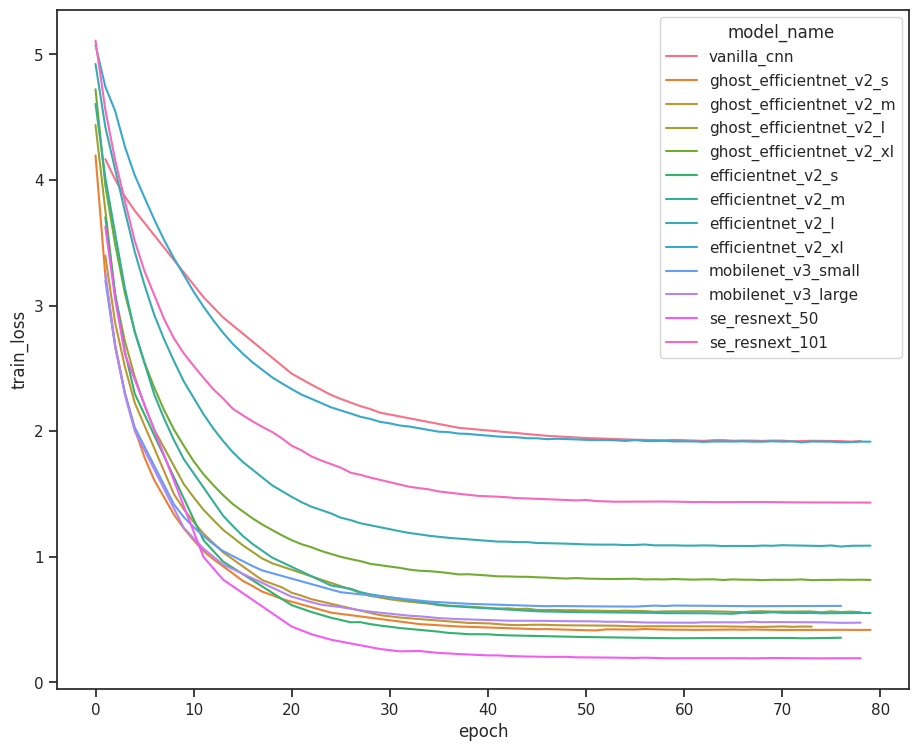

In [39]:
get_fea_df('train_loss')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


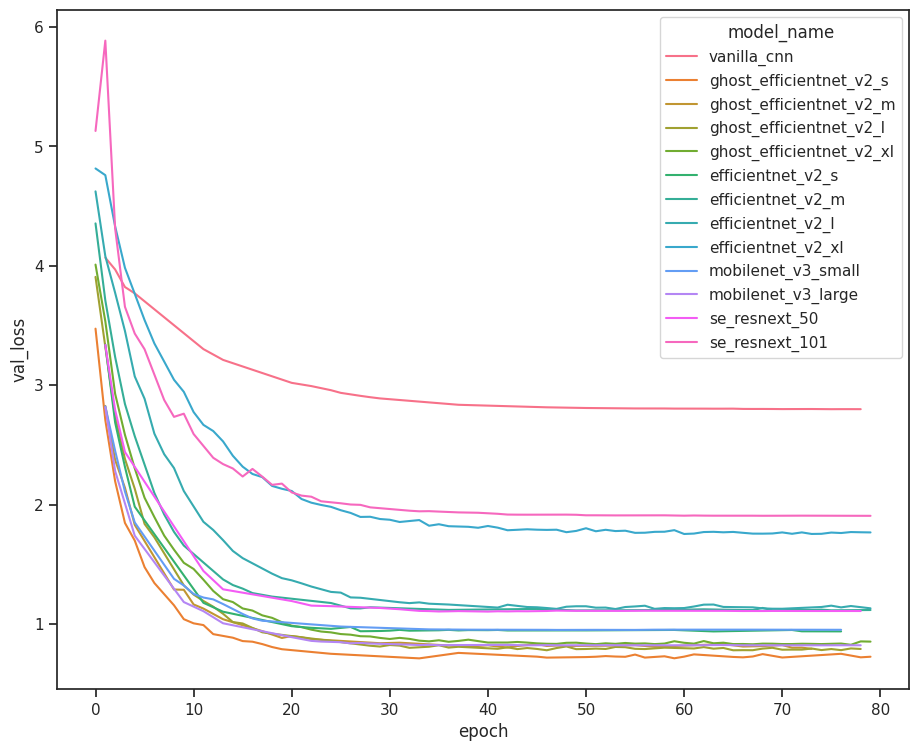

In [31]:
get_fea_df('val_loss')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


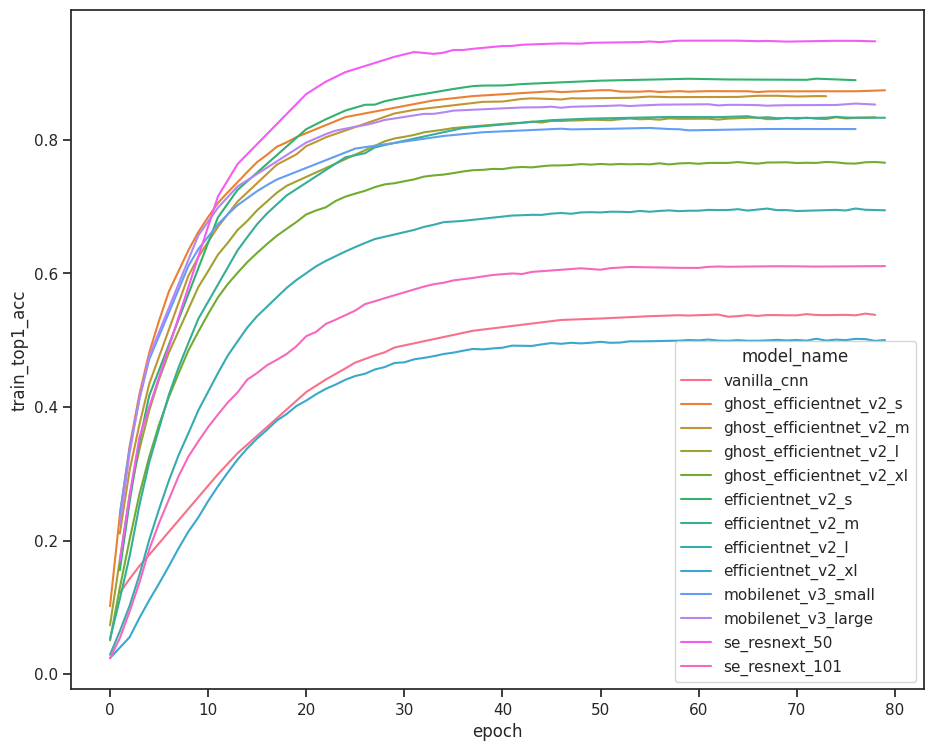

In [50]:
get_fea_df('train_metrics', ytag='train_top1_acc')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


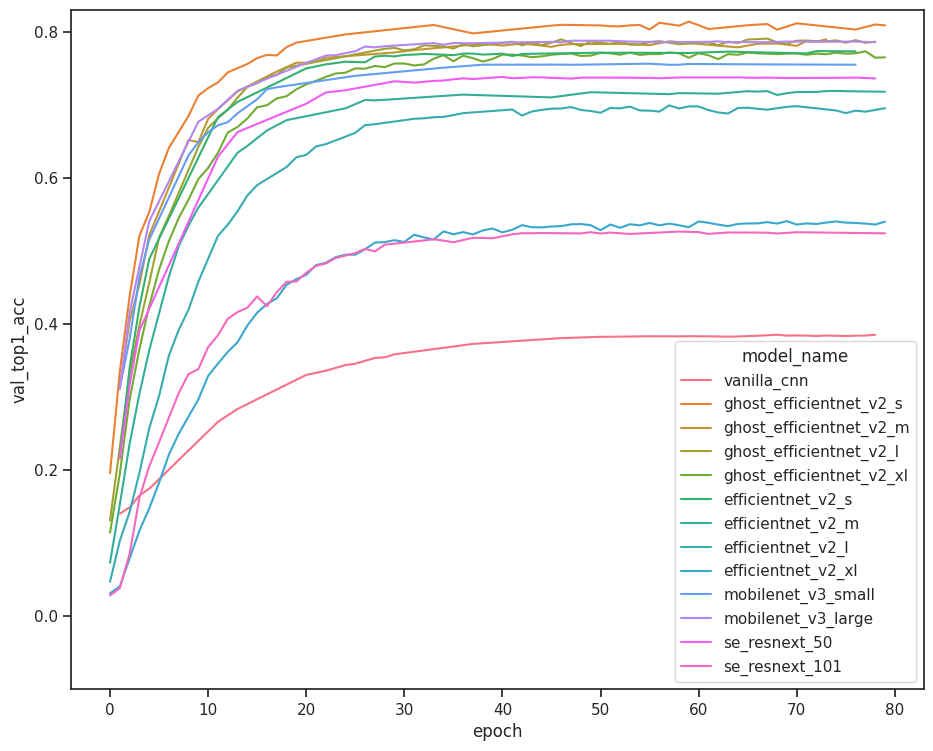

In [49]:
get_fea_df('val_metrics', ytag='val_top1_acc', ylim=(-0.1,0.83))